In [1]:
# import libs
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import numpy as np
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoderEstimator
from pyspark.sql.functions import col
import datetime
from pyspark.sql import Row
import csv

In [2]:
spark

In [3]:
# load dataset
df = spark.read.csv(
    "data/cus-prod-type-cosine-top1000.csv", header=True, mode="DROPMALFORMED"
)
df.show(1)

+---+-------------------+------------------+
|  k|Silhouette distance|              Cost|
+---+-------------------+------------------+
|  2|0.02789118082007418|28322.777659462274|
+---+-------------------+------------------+
only showing top 1 row



In [4]:
df.show(10)
df.count()

+---+--------------------+------------------+
|  k| Silhouette distance|              Cost|
+---+--------------------+------------------+
|  2| 0.02789118082007418|28322.777659462274|
|  3|0.037783498146624905| 27796.63933678341|
|  4| 0.05731489029150743|26638.613583257502|
|  5| 0.06739987288772795|25520.335971188906|
|  6| 0.08039724067800524|25015.630040724343|
|  7| 0.09064387298675411| 24548.07788000168|
|  8| 0.10744935570374883| 23747.97139659508|
|  9| 0.11825390600278637|23293.276780590855|
| 10| 0.12598113759003204|22705.245057657172|
| 11|  0.1546336086352984|21880.447310631887|
+---+--------------------+------------------+
only showing top 10 rows



998

In [5]:
cols = df.columns[1:]
df = df.select(col('k').cast("int").alias('k'),*(col(c).cast("float").alias(c) for c in cols))
df.dtypes

[('k', 'int'), ('Silhouette distance', 'float'), ('Cost', 'float')]

In [6]:
k = df.select('k').rdd.flatMap(lambda x: x).collect()
sd = df.select('silhouette distance').rdd.flatMap(lambda x: x).collect()
ssd = df.select('Cost').rdd.flatMap(lambda x: x).collect()

In [7]:
new_sd = [x**2 for x in sd]
new_ssd = [x/(10**5) for x in ssd]
new_ssd


[0.2832277734375,
 0.27796638671875,
 0.2663861328125,
 0.255203359375,
 0.25015630859375,
 0.24548078125,
 0.23747970703125,
 0.2329327734375,
 0.22705244140625,
 0.21880447265625,
 0.21575732421875,
 0.21526865234375,
 0.1990558203125,
 0.1977879296875,
 0.19152650390625,
 0.186792109375,
 0.1899244921875,
 0.18353490234375,
 0.18211751953125,
 0.18089171875,
 0.175192734375,
 0.17064,
 0.16804142578125,
 0.152687587890625,
 0.1599267578125,
 0.152652734375,
 0.1547778515625,
 0.148253125,
 0.144569345703125,
 0.1417001171875,
 0.137438203125,
 0.133416982421875,
 0.128721845703125,
 0.124495439453125,
 0.115970751953125,
 0.118045556640625,
 0.115743955078125,
 0.110238173828125,
 0.10512607421875,
 0.098328916015625,
 0.105566318359375,
 0.100990166015625,
 0.09452134765625,
 0.092745556640625,
 0.093414423828125,
 0.08664212890625,
 0.087523876953125,
 0.087486689453125,
 0.0765737451171875,
 0.0809678759765625,
 0.076892490234375,
 0.0761737353515625,
 0.076097431640625,
 0.07153

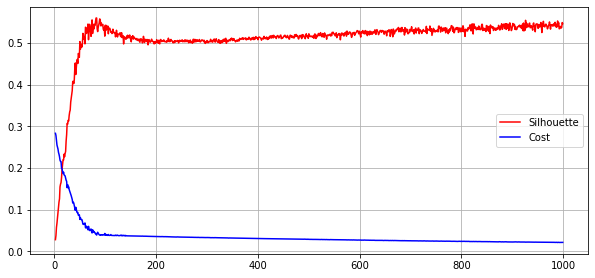

In [9]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
plt.grid(True)
# ax2 = fig.add_subplot(2, 1, 2)
# plt.grid(True)
# ax1.plot(k, sd, 'r', k, sd, 'ko', k, new_ssd, 'b',k, new_ssd, 'ko')
ax1.plot(k, sd, 'r', k, new_ssd, 'b')
# ax2.plot(k, new_sd, 'r')
# plt.xlim(50,53)
# plt.ylim(0,0.05)
# plt.xticks(np.arange(min(k), max(k)+1, 10.))
# plt.tick_params(axis='both',which='major', labelsize=50)
plt.legend(['Silhouette', 'Cost'])
plt.savefig('choose-k.png')